In [1]:
from variables import *
from utilities import fill_streams
from dsar import DSAR

In [2]:
def main():
    dsar_bands: dict[str, list[float]] = {
        'HF' : [0.1, 8.0, 16.0],
        'LF' : [0.1, 4.5, 8.0],
    }
    
    # ============================================
    # Running DSAR per station
    for station in stations:       
        # Calculate DSAR per station per date
        for date in dates:
            date_string = date.strftime('%Y-%m-%d')
            
            # Save stream on a list of streams
            stream: Stream = fill_streams(client, station, date)
            
            # Make sure stream is not empty
            if stream.count():
                
                # Run DSAR per day
                try:
                    dsar = DSAR(stream, bands = dsar_bands, resample = resample_rule)
                    dsar.save()
                except:
                    print(f'⛔ Error in {station} - {date_string}')
                    
        DSAR.concatenate_csv(dsar_directory, station, resample=resample_rule)
                

In [3]:
# main()

In [4]:
# DSAR.concatenate_csv(dsar_directory, station, resample=resample_rule)

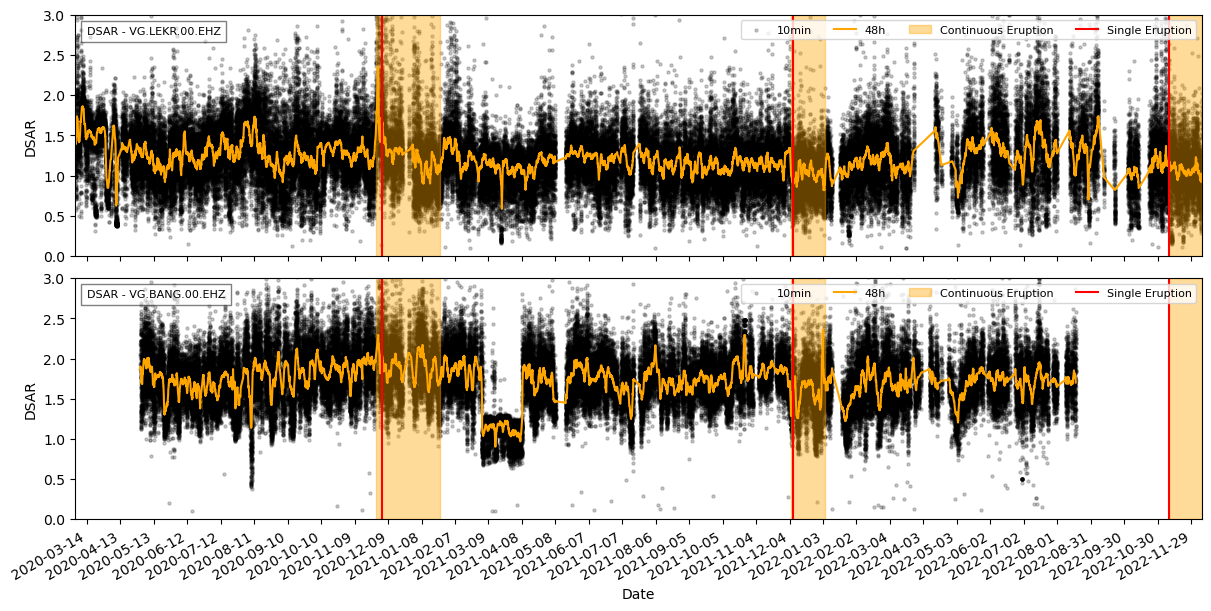

In [5]:
dsar_fig = DSAR.plot(dsar_directory, stations, resample=resample_rule,
          axvspans=continuous_eruptions, axvlines=single_eruptions, interval_day=30, y_max=3.0, window='48h')